<a href="https://colab.research.google.com/github/Sireesha-cloud/Sireesha_INFO5731_Fall2024/blob/main/INFO5731_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import csv
import re
from collections import Counter, defaultdict

# Load the dataset and extract the 'cleaned_text_stemmed' column
dataset = []
with open('/content/cleaned_amazon_reviews (3).csv', encoding='ISO-8859-1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        dataset.append(row['Cleaned_Text_Lemmatized'])  # Adjust column name if necessary

# (1) Count the frequency of all the trigrams (N=3)
def get_trigrams(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return [tuple(words[i:i+3]) for i in range(len(words) - 2)]

trigram_counts = Counter()
for review in dataset:
    trigrams = get_trigrams(review)
    trigram_counts.update(trigrams)

print("Trigram Frequencies:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

# (2) Calculate the probabilities for all the bigrams
def get_bigrams(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return [tuple(words[i:i+2]) for i in range(len(words) - 1)]

bigram_counts = Counter()
word_counts = Counter()

for review in dataset:
    words = re.findall(r'\b\w+\b', review.lower())
    bigrams = get_bigrams(review)
    bigram_counts.update(bigrams)
    word_counts.update(words)

# Calculate bigram probabilities
bigram_probabilities = {}
for (w1, w2), count in bigram_counts.items():
    if word_counts[w2] > 0:
        bigram_probabilities[(w1, w2)] = count / word_counts[w2]

print("\nBigram Probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"{bigram}: {prob:.2f}")

# (3) Extract noun phrases and calculate relative probabilities
def extract_noun_phrases(text):
    # Split text into words
    words = re.findall(r'\b\w+\b', text.lower())
    noun_phrases = []

    # A simple heuristic: treat any two consecutive words as a "noun phrase"
    for i in range(len(words) - 1):
        noun_phrase = f"{words[i]} {words[i+1]}"
        noun_phrases.append(noun_phrase)

    return noun_phrases

# Frequency count for all noun phrases in the dataset
noun_phrase_counts = Counter()
review_noun_phrases = []

for review in dataset:
    noun_phrases = extract_noun_phrases(review)
    noun_phrase_counts.update(noun_phrases)
    review_noun_phrases.append(noun_phrases)

# Ensure that noun_phrase_counts is not empty
if noun_phrase_counts:
    max_freq = max(noun_phrase_counts.values())
    relative_probabilities = []

    for review_nouns in review_noun_phrases:
        relative_probs = {np: noun_phrase_counts[np] / max_freq for np in review_nouns}
        relative_probabilities.append(relative_probs)

    # Display results in a table format
    print("\nNoun Phrase Probabilities per Review")
    header = ["Review"] + list(noun_phrase_counts.keys())
    print("\t".join(header))
    for i, probs in enumerate(relative_probabilities):
        row = [f"{probs.get(np, 0):.2f}" for np in noun_phrase_counts.keys()]
        print(f"Review {i + 1}", "\t".join(row))
else:
    print("No noun phrases were found in the dataset.")


Trigram Frequencies:
('samsung', 'galaxy', 'ultra'): 224
('galaxy', 'ultra', 'absolute'): 112
('ultra', 'absolute', 'powerhouse'): 112
('absolute', 'powerhouse', 'smartphone'): 112
('powerhouse', 'smartphone', 'moment'): 112
('smartphone', 'moment', 'started'): 112
('moment', 'started', 'using'): 112
('started', 'using', 'device'): 112
('using', 'device', 'clear'): 112
('device', 'clear', 'samsung'): 112
('clear', 'samsung', 'truly'): 112
('samsung', 'truly', 'outdone'): 112
('truly', 'outdone', 'model'): 112
('outdone', 'model', 'gb'): 112
('model', 'gb', 'storage'): 112
('gb', 'storage', 'ample'): 112
('storage', 'ample', 'apps'): 112
('ample', 'apps', 'photo'): 112
('apps', 'photo', 'video'): 112
('photo', 'video', 'performance'): 112
('video', 'performance', 'lightning'): 112
('performance', 'lightning', 'fast'): 112
('lightning', 'fast', 'thanks'): 112
('fast', 'thanks', 'latest'): 112
('thanks', 'latest', 'ai'): 112
('latest', 'ai', 'technology'): 112
('ai', 'technology', 'powerf

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import csv
import math
import re
from collections import Counter

# Load the dataset and extract the 'Cleaned_Text_Lemmatized' column
dataset = []
with open('/content/cleaned_amazon_reviews (3).csv', encoding='ISO-8859-1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        dataset.append(row['Cleaned_Text_Lemmatized'])  # Adjust column name if necessary

# Preprocess text to tokenize and normalize words
def preprocess(text):
    return re.findall(r'\b\w+\b', text.lower())

# (1) Build the documents-terms weights (tf * idf) matrix
# Calculate Term Frequency (TF)
doc_terms = [preprocess(doc) for doc in dataset]
tf = [Counter(doc) for doc in doc_terms]

# Calculate Document Frequency (DF) for each term
df = Counter()
for terms in doc_terms:
    unique_terms = set(terms)
    for term in unique_terms:
        df[term] += 1

# Calculate TF-IDF
N = len(dataset)
tfidf_matrix = []
for doc_index, terms in enumerate(tf):
    doc_tfidf = {}
    for term, term_count in terms.items():
        tf_value = term_count / len(doc_terms[doc_index])  # TF for the term in the document
        idf_value = math.log(N / (1 + df[term]))  # IDF for the term
        doc_tfidf[term] = tf_value * idf_value
    tfidf_matrix.append(doc_tfidf)

# (2) Rank the documents with respect to a query using cosine similarity
query = "An outstanding movie with a haunting performance and best character development"
query_terms = preprocess(query)

# Compute TF-IDF for the query
query_tfidf = {}
query_tf = Counter(query_terms)
for term, term_count in query_tf.items():
    tf_value = term_count / len(query_terms)
    idf_value = math.log(N / (1 + df.get(term, 0)))  # IDF for the term in the query
    query_tfidf[term] = tf_value * idf_value

# Calculate cosine similarity between query and each document
def cosine_similarity(doc_tfidf, query_tfidf):
    # Calculate dot product and magnitudes
    dot_product = sum(doc_tfidf.get(term, 0) * query_tfidf.get(term, 0) for term in query_tfidf)
    doc_magnitude = math.sqrt(sum(value ** 2 for value in doc_tfidf.values()))
    query_magnitude = math.sqrt(sum(value ** 2 for value in query_tfidf.values()))

    if doc_magnitude == 0 or query_magnitude == 0:
        return 0.0
    return dot_product / (doc_magnitude * query_magnitude)

# Compute similarities and rank documents
similarities = [(i, cosine_similarity(tfidf_matrix[i], query_tfidf)) for i in range(N)]
ranked_documents = sorted(similarities, key=lambda x: x[1], reverse=True)

# Display ranking results
print("Document Ranking based on Query Similarity:")
for doc_index, similarity in ranked_documents:
    print(f"Document {doc_index + 1}: Similarity = {similarity:.4f}")


Document Ranking based on Query Similarity:
Document 4: Similarity = 0.0297
Document 13: Similarity = 0.0297
Document 22: Similarity = 0.0297
Document 31: Similarity = 0.0297
Document 40: Similarity = 0.0297
Document 49: Similarity = 0.0297
Document 58: Similarity = 0.0297
Document 67: Similarity = 0.0297
Document 76: Similarity = 0.0297
Document 85: Similarity = 0.0297
Document 94: Similarity = 0.0297
Document 103: Similarity = 0.0297
Document 112: Similarity = 0.0297
Document 121: Similarity = 0.0297
Document 130: Similarity = 0.0297
Document 139: Similarity = 0.0297
Document 148: Similarity = 0.0297
Document 157: Similarity = 0.0297
Document 166: Similarity = 0.0297
Document 175: Similarity = 0.0297
Document 184: Similarity = 0.0297
Document 193: Similarity = 0.0297
Document 202: Similarity = 0.0297
Document 211: Similarity = 0.0297
Document 220: Similarity = 0.0297
Document 229: Similarity = 0.0297
Document 238: Similarity = 0.0297
Document 247: Similarity = 0.0297
Document 256: Si

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

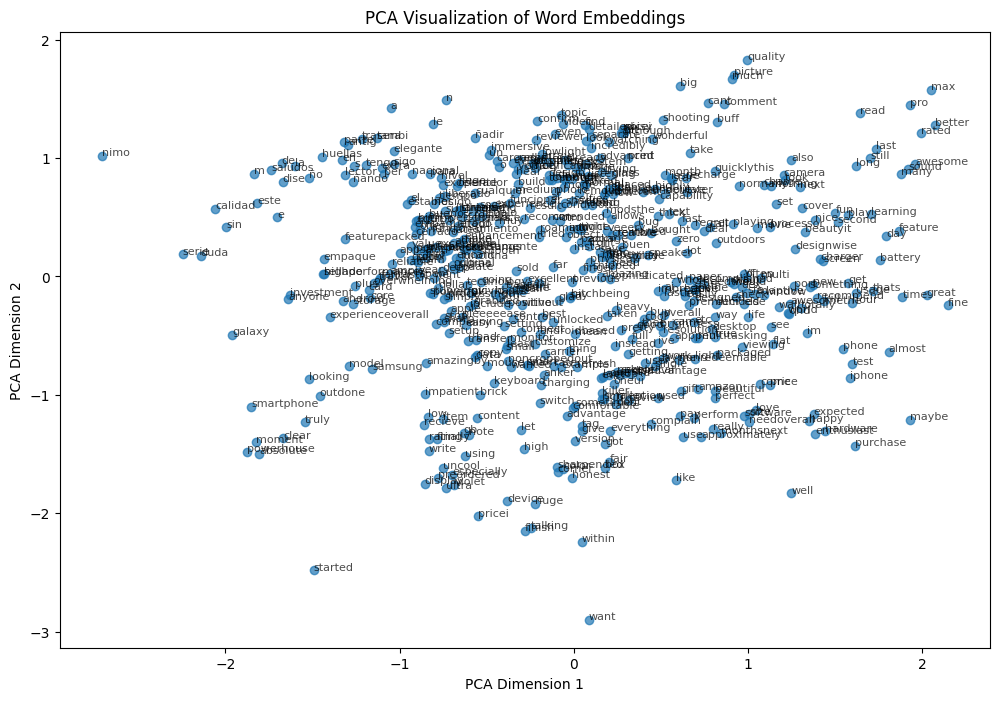

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


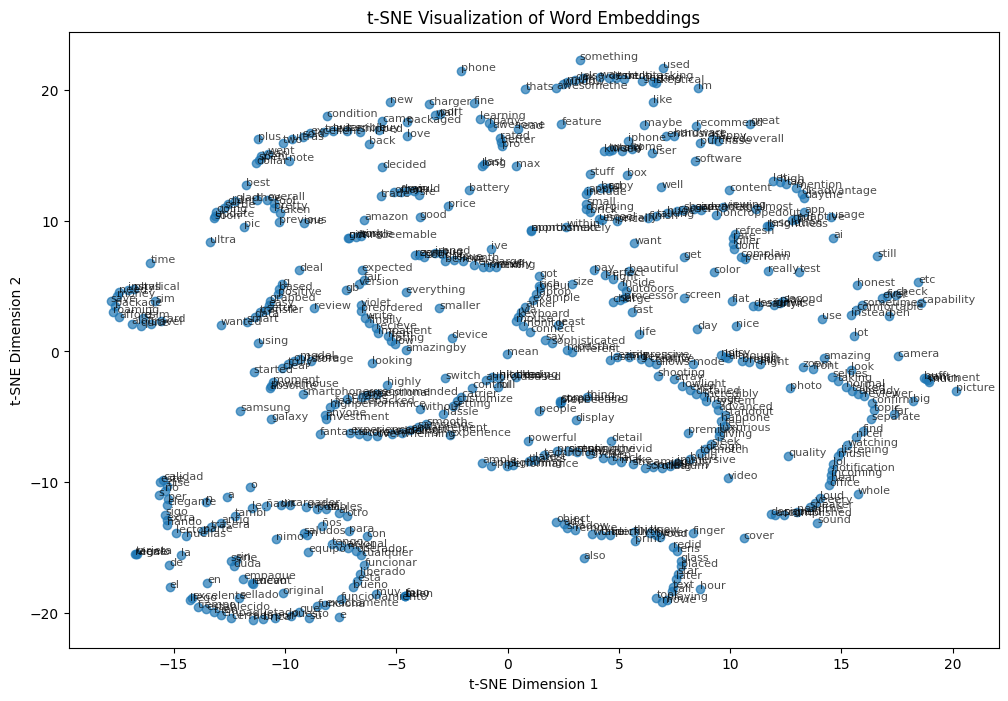

In [ ]:
import csv
import re
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Load and preprocess the text data
# Read data from CSV file and collect the 'Cleaned_Text_Lemmatized' column
data = []
with open('/content/cleaned_amazon_reviews (3).csv', encoding='ISO-8859-1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row['Cleaned_Text_Lemmatized'])

# Tokenize and preprocess each document
def preprocess_text(text):
    return re.findall(r'\b\w+\b', text.lower())

tokenized_data = [preprocess_text(doc) for doc in data]

# Step 2: Initialize the Word2Vec model and build the vocabulary
embedding_dim = 300
word2vec_model = Word2Vec(vector_size=embedding_dim, window=5, min_count=2, sg=1)

# Build vocabulary from tokenized data
word2vec_model.build_vocab(tokenized_data)

# Train the model
word2vec_model.train(tokenized_data, total_examples=word2vec_model.corpus_count, epochs=10)

# Step 3: Visualize the word embeddings

# Reduce dimensionality to 2D using PCA or t-SNE
words = list(word2vec_model.wv.index_to_key)
word_vectors = word2vec_model.wv[words]

# PCA visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("PCA Visualization of Word Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

# t-SNE visualization (optional)
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


https://github.com/Sireesha-cloud/Sireesha_INFO5731_Fall2024/blob/main/sentiment_analysis_data.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The assignment was satisfying and demanding, especially when it came to preprocessing the data, training the word embedding model, and visualising the embeddings. Careful consideration and testing were necessary to resolve data encoding problems and adjust the Word2Vec settings. I liked how the model reflected semantic linkages, which brought out the themes in the dataset and improved my knowledge of natural language processing. It was very fulfilling to visualise the embeddings using PCA and t-SNE as it vividly depicted the connections between the words. A little more time, nevertheless, would have improved the assignment's difficulty by enabling more thorough investigation and testing of various model configurations and embedding strategies.

